# Q1_Mortality_in_US_per_Underlaying_Cause

## Importing

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the cleaned data frame

In [263]:
df = pd.read_csv("USCDI_Cleaned.csv")
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2019,SD,South Dakota,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,20.2,...,22.2,Overall,Overall,POINT (-100.3735306369997 44.353130053000484),46.0,CAN,CAN05,CRDRATE,OVERALL,OVR
1,2015,2019,TX,Texas,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,2.9,...,3.0,Sex,Female,POINT (-99.42677020599967 31.827240407000488),48.0,CAN,CAN03,CRDRATE,SEX,SEXF
2,2015,2019,VT,Vermont,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,23.0,...,25.5,Overall,Overall,POINT (-72.51764079099962 43.62538123900049),50.0,CAN,CAN05,CRDRATE,OVERALL,OVR
3,2015,2019,WV,West Virginia,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Crude Rate,31.6,...,33.2,Sex,Female,POINT (-80.71264013499967 38.66551020200046),54.0,CAN,CAN02,CRDRATE,SEX,SEXF
4,2015,2019,WI,Wisconsin,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Age-adjusted Rate,444.6,...,447.8,Sex,Female,POINT (-89.81637074199966 44.39319117400049),55.0,CAN,CAN07,AGEADJRATE,SEX,SEXF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36643,2020,2020,US,United States,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,37.3,...,38.7,Race/Ethnicity,"Multiracial, non-Hispanic",NaN,59.0,CVD,CVD09,CRDRATE,RACE,MRC
36644,2020,2020,WV,West Virginia,NVSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease mortalit...,"cases per 100,000",Age-adjusted Rate,NaN,...,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54.0,COPD,COPD06,AGEADJRATE,RACE,AIAN
36645,2020,2020,TX,Texas,NVSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease mortalit...,"cases per 100,000",Crude Rate,54.1,...,55.8,Age,Age 45-64,POINT (-99.42677020599967 31.827240407000488),48.0,COPD,COPD06,CRDRATE,AGE,AGE4564
36646,2020,2020,WY,Wyoming,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Age-adjusted Rate,30.2,...,35.8,Sex,Female,POINT (-108.10983035299967 43.23554134300048),56.0,CVD,CVD07,AGEADJRATE,SEX,SEXF


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36648 entries, 0 to 36647
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  36648 non-null  int64  
 1   YearEnd                    36648 non-null  int64  
 2   LocationAbbr               36648 non-null  object 
 3   LocationDesc               36648 non-null  object 
 4   DataSource                 36648 non-null  object 
 5   Topic                      36648 non-null  object 
 6   Question                   36648 non-null  object 
 7   DataValueUnit              36648 non-null  object 
 8   DataValueType              36648 non-null  object 
 9   DataValue                  26089 non-null  float64
 10  DataValueAlt               26088 non-null  float64
 11  DataValueFootnoteSymbol    10559 non-null  object 
 12  DataValueFootnote          10559 non-null  object 
 13  LowConfidenceLimit         25984 non-null  flo

In [265]:
df['Topic'].unique()

array(['Cancer', 'Chronic Obstructive Pulmonary Disease', 'Asthma',
       'Diabetes', 'Chronic Kidney Disease', 'Cardiovascular Disease',
       'Alcohol'], dtype=object)

In [266]:
df['StratificationCategoryID1'].unique()

array(['OVERALL', 'SEX', 'RACE', 'AGE', nan], dtype=object)

In [267]:
df['LocationDesc'].unique()

array(['South Dakota', 'Texas', 'Vermont', 'West Virginia', 'Wisconsin',
       'Florida', 'Illinois', 'Iowa', 'Kansas', 'Massachusetts',
       'Minnesota', 'Mississippi', 'New Hampshire', 'South Carolina',
       'Wyoming', 'Alaska', 'Delaware', 'Indiana', 'Maine', 'Maryland',
       'Michigan', 'North Carolina', 'North Dakota', 'Oregon',
       'United States', 'Alabama', 'Missouri', 'New Jersey', 'New York',
       'Connecticut', 'Georgia', 'Hawaii', 'Montana', 'New Mexico',
       'Oklahoma', 'Idaho', 'Arkansas', 'Louisiana', 'Kentucky',
       'Arizona', 'California', 'Nebraska', 'Pennsylvania', 'Washington',
       'Nevada', 'Ohio', 'District of Columbia', 'Rhode Island',
       'Colorado', 'Virginia', 'Utah', 'Tennessee', 'Puerto Rico'],
      dtype=object)

In [268]:
# removing irelatable data
df = df[df['DataValueUnit'] != 'cases per 1,000']

# Convert from cases per 1,000,000 → cases per 100,000
mask = df['DataValueUnit'].astype(str).str.strip().eq('cases per 1,000,000')
df.loc[mask, 'DataValue'] = df.loc[mask, 'DataValue'] / 10
df.loc[mask, 'DataValueUnit'] = 'cases per 100,000'

In [269]:
df['DataValueUnit'].unique()

array(['per 100,000', 'cases per 100,000'], dtype=object)

In [270]:
the_filter = df['StratificationCategoryID1'] == 'OVERALL'
dfo = df[the_filter]
dfo

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2019,SD,South Dakota,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,20.2,...,22.2,Overall,Overall,POINT (-100.3735306369997 44.353130053000484),46.0,CAN,CAN05,CRDRATE,OVERALL,OVR
2,2015,2019,VT,Vermont,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,23.0,...,25.5,Overall,Overall,POINT (-72.51764079099962 43.62538123900049),50.0,CAN,CAN05,CRDRATE,OVERALL,OVR
8,2016,2020,KS,Kansas,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Age-adjusted Rate,19.8,...,20.8,Overall,Overall,POINT (-98.20078122699965 38.34774030000045),20.0,CAN,CAN02,AGEADJRATE,OVERALL,OVR
11,2016,2020,MN,Minnesota,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Age-adjusted Rate,1.2,...,1.4,Overall,Overall,POINT (-94.79420050299967 46.35564873600049),27.0,CAN,CAN03,AGEADJRATE,OVERALL,OVR
14,2016,2020,SC,South Carolina,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,22.6,...,23.5,Overall,Overall,POINT (-81.04537120699968 33.998821303000454),45.0,CAN,CAN05,CRDRATE,OVERALL,OVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36566,2020,2020,VT,Vermont,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,244.0,...,256.3,Overall,Overall,POINT (-72.51764079099962 43.62538123900049),50.0,CVD,CVD09,CRDRATE,OVERALL,OVR
36580,2021,2021,AL,Alabama,NVSS,Alcohol,Chronic liver disease mortality among all peop...,"cases per 100,000",Crude Rate,20.7,...,22.0,Overall,Overall,POINT (-86.63186076199969 32.84057112200048),1.0,ALC,ALC09,CRDRATE,OVERALL,OVR
36586,2020,2020,VA,Virginia,NVSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease mortalit...,"cases per 100,000",Crude Rate,91.1,...,94.2,Overall,Overall,POINT (-78.45789046299967 37.54268067400045),51.0,COPD,COPD05,CRDRATE,OVERALL,OVR
36593,2021,2021,AL,Alabama,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,66.7,...,68.9,Overall,Overall,POINT (-86.63186076199969 32.84057112200048),1.0,CVD,CVD07,CRDRATE,OVERALL,OVR


In [271]:
# Grouping the number of mortality (DataValue) per topic 
s = dfo.groupby('Topic', as_index=False)['DataValue'].mean()
s

,Topic,DataValue
0,Alcohol,14.263402
1,Asthma,1.187162
2,Cancer,110.426374
3,Cardiovascular Disease,111.367731
4,Chronic Kidney Disease,270.219712
5,Chronic Obstructive Pulmonary Disease,180.253453
6,Diabetes,51.722740


In [272]:
s.columns

Index(['Topic', 'DataValue'], dtype='object')

/var/folders/pv/w5_hb2x92gs40wyzx32txx800000gn/T/ipykernel_30258/1667190238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='DataValue', y='Topic', palette='Reds_r')


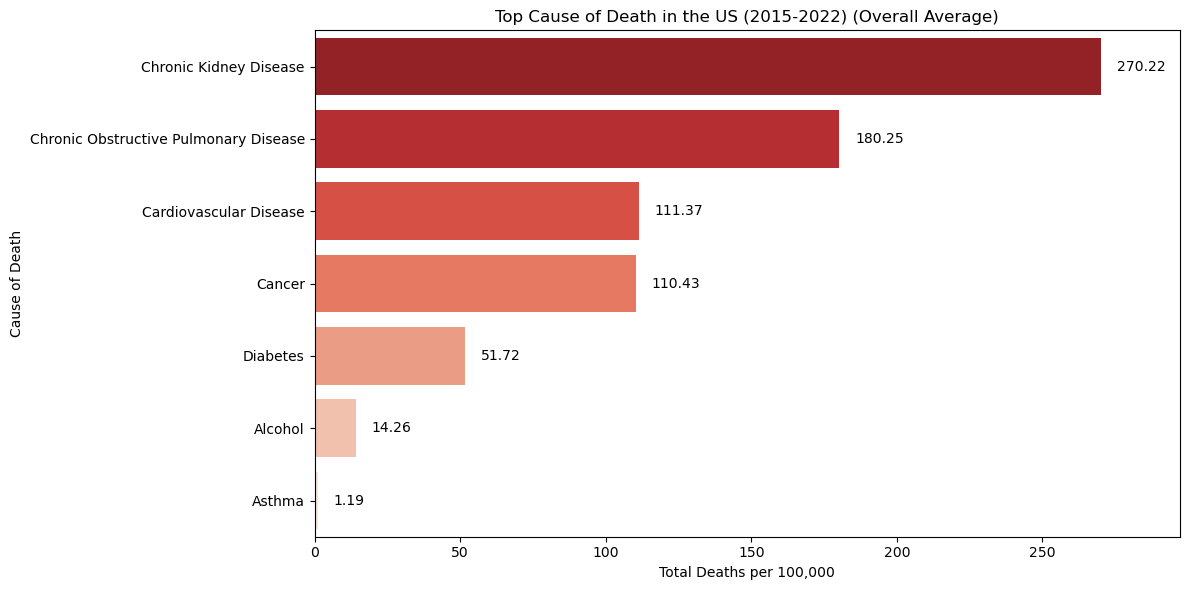

In [273]:

plot_data = s.copy().sort_values('DataValue', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=plot_data, x='DataValue', y='Topic', palette='Reds_r')

plt.title('Top Cause of Death in the US (2015-2022) (Overall Average)')
plt.xlabel('Total Deaths per 100,000')
plt.ylabel('Cause of Death')

max_val = plot_data['DataValue'].max()
ax.set_xlim(0, max_val * 1.10)  

for i, v in enumerate(plot_data['DataValue']):
    if v < 500.00:
        ax.text(v + max_val*0.02, i, f"{v:.2f}",
                color='black', va='center', ha='left', clip_on=False, zorder=5)
    else:
        ax.text(v/2, i, f"{v:.2f}",
                color='white', va='center', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [274]:
us = df[df['LocationDesc'] != 'United States'].copy()
us = us.groupby('Topic')['DataValue'].agg(['sum', 'min', 'max', 'median', 'mean']).reset_index()
us


,Topic,sum,min,max,median,mean
0,Alcohol,24738.4,1.3,278.9,13.600,17.887491
1,Asthma,1077.6,0.2,7.4,1.200,1.464130
2,Cancer,993611.9,0.7,1089.4,26.600,109.476851
3,Cardiovascular Disease,606576.7,0.6,1394.5,76.900,122.913212
4,Chronic Kidney Disease,14929.3,12.5,1661.1,41.535,146.365686
5,Chronic Obstructive Pulmonary Disease,473734.9,7.6,974.5,138.100,168.889447
6,Diabetes,196350.0,0.4,1006.2,56.600,75.028659


/var/folders/pv/w5_hb2x92gs40wyzx32txx800000gn/T/ipykernel_30258/4266211564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=states_avg, x='DataValue', y='Topic', palette='Blues_r')


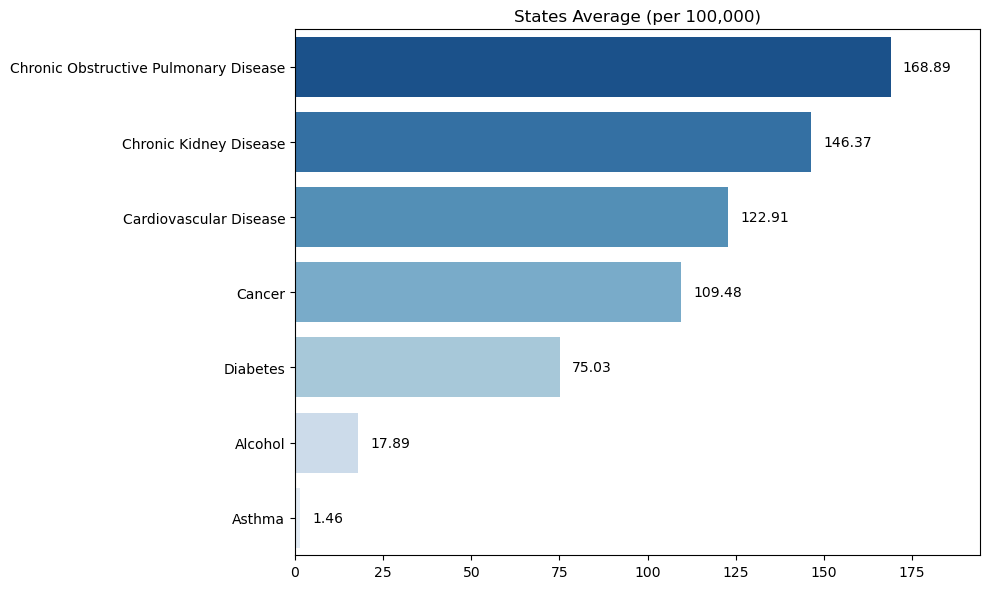

In [275]:
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=states_avg, x='DataValue', y='Topic', palette='Blues_r')
ax1.set_title('States Average (per 100,000)')
ax1.set_xlabel('')
ax1.set_ylabel('')
max_val1 = states_avg['DataValue'].max()
ax1.set_xlim(0, max_val1 * 1.15)
for i, v in enumerate(states_avg['DataValue']):
    ax1.text(v + max_val1*0.02, i, f"{v:.2f}",
             color='black', va='center', ha='left', clip_on=False, zorder=5)
plt.tight_layout()
plt.show()

/var/folders/pv/w5_hb2x92gs40wyzx32txx800000gn/T/ipykernel_30258/3820714021.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=topic_avg, x='DataValue', y='Topic', palette='Blues_r', errorbar=None)


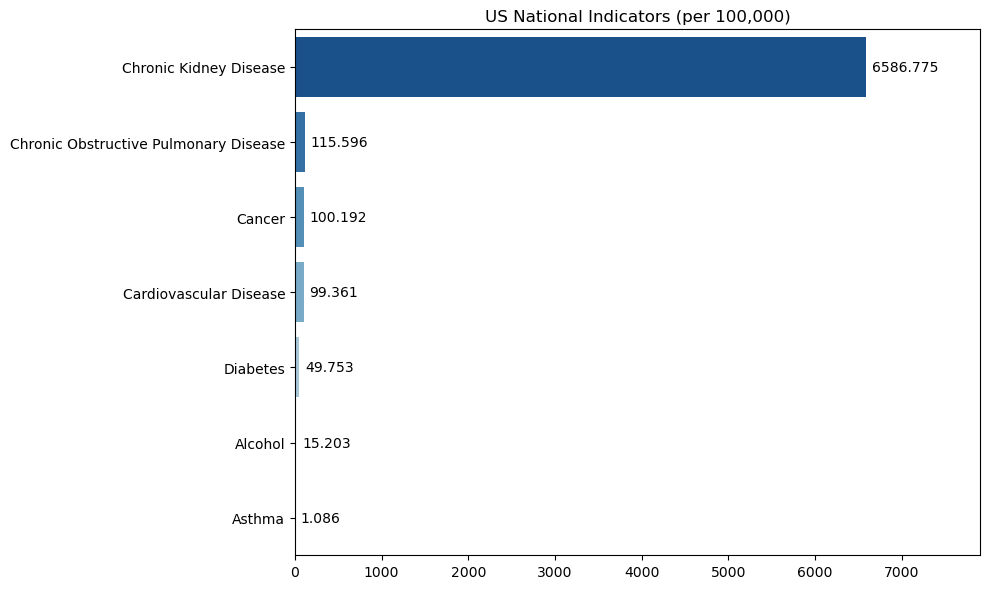

In [276]:
topic_avg = (
    df[df['LocationDesc'] == 'United States']
    .groupby('Topic')['DataValue']
    .mean()
    .reset_index()
    .sort_values('DataValue', ascending=False)
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=topic_avg, x='DataValue', y='Topic', palette='Blues_r', errorbar=None)
ax.set_title('US National Indicators (per 100,000)')
ax.set_xlabel('')
ax.set_ylabel('')

max_val = topic_avg['DataValue'].max()
ax.set_xlim(0, max_val * 1.2)

for i, v in enumerate(topic_avg['DataValue']):
    ax.text(v + max_val*0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.show()


In [277]:
# reseting the index and saving the top causes as a csv file

In [278]:
causes_us = s.reset_index()
causes_us = causes_us.drop(columns = 'index')
causes_us

,Topic,DataValue
0,Alcohol,14.263402
1,Asthma,1.187162
2,Cancer,110.426374
3,Cardiovascular Disease,111.367731
4,Chronic Kidney Disease,270.219712
5,Chronic Obstructive Pulmonary Disease,180.253453
6,Diabetes,51.722740


In [279]:
#mortality per 100,000 in the us

usa = causes_us.groupby('Topic')['DataValue'].agg(['sum', 'min', 'max', 'median', 'mean']).reset_index()
usa

,Topic,sum,min,max,median,mean
0,Alcohol,14.263402,14.263402,14.263402,14.263402,14.263402
1,Asthma,1.187162,1.187162,1.187162,1.187162,1.187162
2,Cancer,110.426374,110.426374,110.426374,110.426374,110.426374
3,Cardiovascular Disease,111.367731,111.367731,111.367731,111.367731,111.367731
4,Chronic Kidney Disease,270.219712,270.219712,270.219712,270.219712,270.219712
5,Chronic Obstructive Pulmonary Disease,180.253453,180.253453,180.253453,180.253453,180.253453
6,Diabetes,51.722740,51.722740,51.722740,51.722740,51.722740


In [280]:
#saving the new data frame
causes_us.to_csv('Top_Cause_of_Death_in_US.csv', index=False)